In [123]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.facecolor'] = 'white'


In [2]:
gdf = gpd.read_file(r"X:\georisk\HaRIA_B_Wind\data\derived\obs\1-minute\2022\stationlist.shp", dtype={'stnDataSta':int, 'stnDataEnd': int})
gdf.set_index('stnNum', inplace=True)

In [4]:
stnList = [3003, 4032, 5007, 7045, 9021, 9741, 9999, 9789, 12038, 
           13017, 14015, 15135, 15590, 16001, 17043, 18012, 18201, 
           23034, 23083, 26021, 29127, 31011, 33045, 36031, 39083,
           40004, 40842, 41359, 44021, 48027, 53115, 55325, 59040, 
           61078, 65070, 66037, 67105, 68072, 70014, 70351, 72150,
           76031, 81124, 85072, 86282, 87031, 91104, 91311, 94008]
#gdf.loc[stnList, ['stnName', 'stnDataSta', 'stnDataEnd', 'pctComplet', 'pctY']].to_csv(r"..\data\hqstations.csv")

<AxesSubplot:xlabel='pctY', ylabel='Count'>

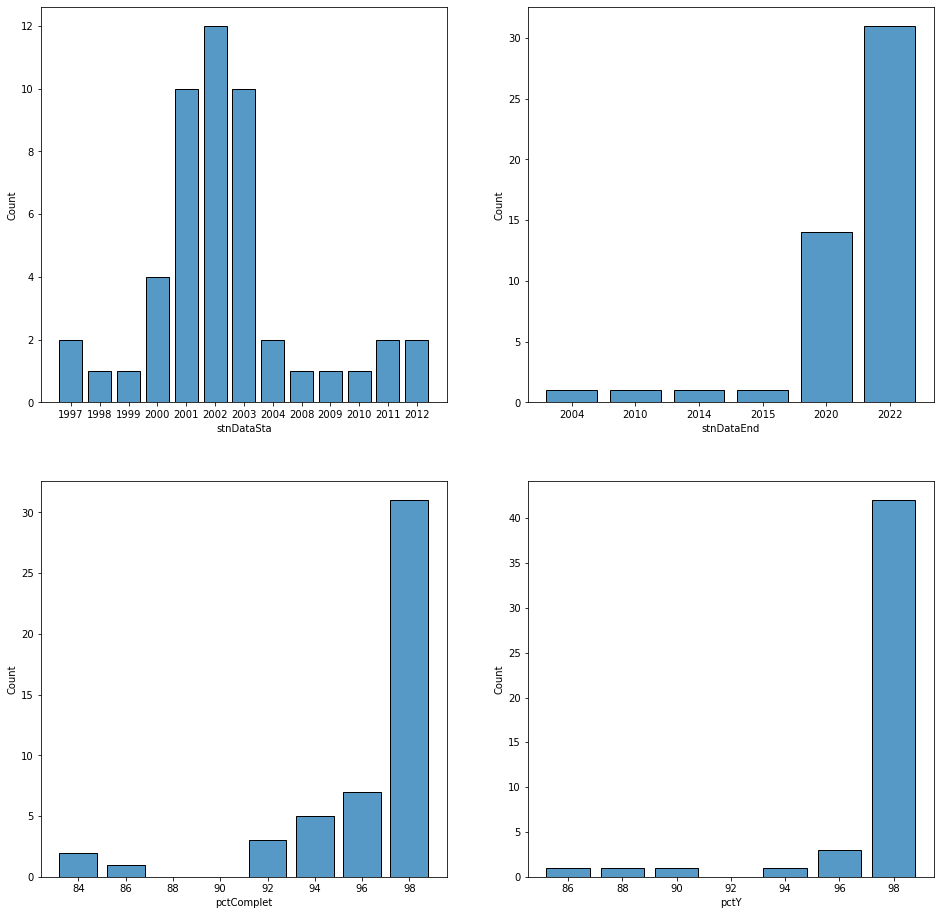

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
sns.histplot(gdf.loc[stnList]['stnDataSta'].sort_values(), ax=axes[0, 0], shrink=0.8)
sns.histplot(gdf.loc[stnList]['stnDataEnd'].sort_values(), ax=axes[0, 1], shrink=0.8)
sns.histplot(gdf.loc[stnList]['pctComplet'], ax=axes[1, 0], shrink=0.8)
sns.histplot(gdf.loc[stnList]['pctY'], ax=axes[1, 1], shrink=0.8)

Make a map of the station locations, with the size of markers indicating length of record and colour showing the percentage complete. Include a color bar for the percentage complete, state borders, latitude/longitude grid lines and labels.

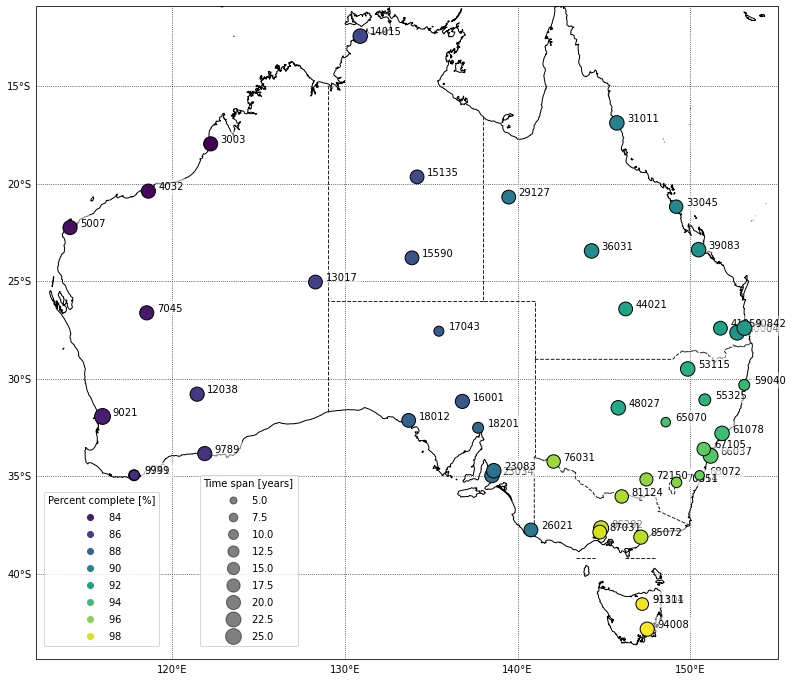

In [124]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
cbar_kwargs = {"shrink":0.9}
states = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
tspan = gdf.loc[stnList]['stnDataEnd'].astype(int) - gdf.loc[stnList]['stnDataSta'].astype(int)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.figure.set_size_inches(15,12)
gdf.loc[stnList].plot(ax=ax, markersize=tspan * 10, 
                      transform=ccrs.PlateCarree(), 
                      c=gdf.loc[stnList]['pctComplet'],
                      ec='k',
                      zorder=10, cmap='viridis',)

fs = ax.scatter(gdf.loc[stnList]['stnLon'], gdf.loc[stnList]['stnLat'], c=gdf.loc[stnList]['pctComplet'], s=tspan, cmap='viridis',)
handles, labels = fs.legend_elements(prop="sizes", alpha=0.5)

for handle in handles:
    handle.set_markersize(handle.get_markersize()*np.sqrt(10))

ax.coastlines(resolution='10m')
ax.add_feature(states, edgecolor='0.15', linestyle='--')
gl = ax.gridlines(draw_labels=True, linestyle=':', color='0.15')
gl.top_labels = False
gl.right_labels = False

l1 = ax.legend(*fs.legend_elements(),
               loc=(0.01, 0.02),
               title="Percent complete [%]")
ax.add_artist(l1)
l2 = ax.legend(handles, labels,
               loc=(0.22, 0.02),
               title="Time span [years]")
annotations = gdf.loc[stnList].index
for xi, yi, text in zip(gdf.loc[stnList]['stnLon'], gdf.loc[stnList]['stnLat'], annotations):
    ax.annotate(text,
                xy=(xi, yi), xycoords='data',
                xytext=(10, 1.5), textcoords='offset points',
                bbox=dict(boxstyle='round', fc='white', 
                          ec="None", alpha=0.5, lw=2))
ax.set_facecolor("white")
plt.savefig(r"..\data\hqstation_map.png", bbox_inches="tight")